<a href="https://colab.research.google.com/github/matheuspercario/TT007-AnaliseDadosPython/blob/master/exercicios/Aula5-POO/Python-POO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python: Programação Orientada a Objetos

**POO encapsula dados** (atributos) e **funções** (comportamentos) em componentes chamados **classes**
- Os dados e as funções de uma classe estão intimamente ligados.

- Classes têm a propriedade de esconder a informação. 
    - Idealmente, objetos comunicam-se entre si por meio de **interfaces bem definidas**.
    - Um objeto **‘não sabe’** como outro objeto foi implementado


- Cada classe contém dados e um conjunto de funções para manipular os dados. 
    - O **conjunto de dados** em uma classe é chamado de **atributos** ou **membros de dados**.
    - O **conjunto de funções** em uma classe é chamado de **métodos** ou **funções membros**.

<font color=blue>O foco na POO são as classes</font> 
- Ao invés de focar em funções, como na programação procedural.


## Definindo uma classe

    class <NomeDaClasse>:
        """ Descrição da classe """

<font color=gray>String de documentação.</font>
- Convenção: entre aspas duplas-triplas

- String de documentação deve vir imediatamente após o cabeçalho da classe. 
- Pode ser acessada como:

**print NomeDaClasse.\_\_doc\_\_**


- O nome da classe segue a mesma convenção das variáveis, exceto que **a primeira letra deve ser Maiúscula**
- A linha que contem o nome da classe é chamada de cabeçalho da classe (class’s header). 
- O corpo da classe compreende ao código que contém os métodos e os atributos.

Módulos, metodos e funções também podem especificar uma string de documentação.

#### Exemplo - A classe Time

In [33]:
"""Class Time with read-write properties."""

class Time:
    """Class Time with read-write properties."""

    def __init__(self, hour=0, minute=0, second=0):
        """Initialize each attribute."""
        self.hour = hour  # 0-23
        self.minute = minute  # 0-59
        self.second = second  # 0-59

    @property
    def hour(self):
        """Return the hour."""
        return self._hour

    @hour.setter
    def hour(self, hour):
        """Set the hour."""
        if not (0 <= hour < 24):
            raise ValueError(f'Hour ({hour}) must be 0-23')

        self._hour = hour

    @property
    def minute(self):
        """Return the minute."""
        return self._minute

    @minute.setter
    def minute(self, minute):
        """Set the minute."""
        if not (0 <= minute < 60):
            raise ValueError(f'Minute ({minute}) must be 0-59')

        self._minute = minute

    @property
    def second(self):
        """Return the second."""
        return self._second

    @second.setter
    def second(self, second):
        """Set the second."""
        if not (0 <= second < 60):
            raise ValueError(f'Second ({second}) must be 0-59')

        self._second = second

    @property
    def get_time(self):
        """Get values (tuple) of hour, minute and second."""
        hour = self.hour
        minute = self.minute
        second = self.second
        return hour, minute, second

    def set_time(self, t):
        """Set values of hour, minute, and second."""
        hour, minute, second = t
        self.hour = hour
        self.minute = minute
        self.second = second

    def __repr__(self):
        """Return Time string for repr()."""
        return (f'Time(hour={self.hour}, minute={self.minute}, ' + 
                f'second={self.second})')

    def __str__(self):
        """Return Time string in 12-hour clock format."""
        return (('12' if self.hour in (0, 12) else str(self.hour % 12)) + 
                f':{self.minute:0>2}:{self.second:0>2}' + 
                (' AM' if self.hour < 12 else ' PM'))

O método especial **\_\_init\_\_**, é o construtor da classe.

Um construtor é um método especial que é **executado toda vez que um objeto da classe é criado**. 

O construtor (método **\_\_init\_\_**) inicializa os atributos do objeto e retorna **None**.


> TODO método, incluindo os construtores **deve ter ao menos um parêmetro**.

> Este parametro representa o objeto da classe para o qual o método foi chamado.

> Este parametro é chamado de **objeto instância da classe** ou **argumento de referência de objeto**

> Métodos precisam usar a referência de objeto para acessar atributos e outros métodos pertencentes à classe. 

> Por convenção, o argumento de referência de objeto é chamado _**self**_


**Falha em especificar a referência ao objeto ( _self_ ) como o primeiro parâmetro na definição de um método causa um erro fatal de execução.**


### A classe Time: propriedades de leitura e gravação

O código abaixo define uma **propriedade de leitura e de gravação** chamada **hour** que manipula um atributo de dados denominado **\_hour**. 

- A convenção de nomenclatura de sublinhado simples (**\_**) indica que o código do cliente não deve acessar **\_hour** diretamente. 

- Note que as **propriedades são implementadas como métodos**. 
- Cada propriedade define um método _**getter**_ que obtém (ou seja, retorna) o valor de um atributo de dados e pode opcionalmente definir um método _**setter**_ que define o valor de um atributo de dados:

    @property
    def hour(self):
        """Return the hour."""
        return self._hour

    @hour.setter
    def hour(self, hour):
        """Set the hour."""
        if not (0 <= hour < 24):
            raise ValueError(f'Hour ({hour}) must be 0-23')

        self._hour = hour

O decorador **@property** precede a propriedade de retorno (**getter**) do método, que recebe apenas o parâmetro **_self_**.
- Nos bastidores, um decorador adiciona código à função decorada - neste caso, para fazer a função hora <font color=blue> funcionar com a sintaxe de atributo </font>. 
O nome do método **getter** é o nome da propriedade. Este método **getter** retorna o valor do atributo de dados **_hour**. 

A expressão abaixo refere-se a um código do cliente que invoca o método **getter**:

**<center> wake_up.hour </center>**

Também pode-se usar o método **getter** dentro da classe.

- Um decorador da forma **@property_name.setter** (neste caso, **@hour.setter**) precede o a propriedade de **setter** do método. 
    - O método recebe dois parâmetros - **self** e um parâmetro (**hour**) que representa o valor que está sendo atribuído à propriedade. 

- Se o parâmetro de hora for valor é válido, este método o atribui ao atributo **_hour** do objeto **self**; de outra forma, o método gera um **ValueError**. 

A seguinte expressão de código-cliente invoca o configurador por atribuindo um valor à propriedade: 

**<center> wake_up.hour = 8 </center>**

    def __init__(self, hour=0, minute=0, second=0):
        """Initialize each attribute."""
        self.hour = hour  # 0-23  # invoca o setter!
        self.minute = minute  # 0-59
        self.second = second  # 0-59

Também invoca-se este **setter** na linha **self.hour = hour** dentro da classe **\_\_init\_\_**:

- Usar o **setter** nos permite validar o argumento de hora de **\_\_init\_\_** antes de criar e inicializar o atributo **\_hour** do objeto, que ocorre na primeira vez que o configurador da propriedade hour é executado. 



> Uma propriedade de leitura e gravação possui um **getter** e um **setter**. Propriedades somente leitura tem apenas um **getter**.

#### A classe Time: Propriedades de leitura-gravação de minute e second

As as propriedades de gravação de **minute** e **second** garantem que seu segundo argumento está no intervalo 0-59 (o intervalo válido de valores para minutos e segundos):

    @property
    def minute(self):
        """Return the minute."""
        return self._minute

    @minute.setter
    def minute(self, minute):
        """Set the minute."""
        if not (0 <= minute < 60):
            raise ValueError(f'Minute ({minute}) must be 0-59')

        self._minute = minute

    @property
    def second(self):
        """Return the second."""
        return self._second

    @second.setter
    def second(self, second):
        """Set the second."""
        if not (0 <= second < 60):
            raise ValueError(f'Second ({second}) must be 0-59')

        self._second = second

#### A classe Time: o método set_time

Fornecemos o método **set_time** como uma maneira conveniente de alterar todos os três atributos em uma única chamada de método. 
- Os comandos em **set_time** invocam os **setters** para as propriedades de hora, minuto e segundo:

    def set_time(self, hour=0, minute=0, second=0):
        """Set values of hour, minute, and second."""
        self.hour = hour
        self.minute = minute
        self.second = second

#### A classe Time: o método especial \_\_repr\_\_
Quando você passa um objeto para a função **\_\_repr\_\_** - o que acontece implicitamente quando você avalia uma variável em uma sessão IPython - o método especial **\_\_repr\_\_** da classe correspondente é chamada para obter uma representação de string do objeto.
- A função Python **\_\_repr\_\_** retorna a representação do objeto. Pode ser qualquer expressão Python válida, como tupla, dicionário, string, etc.

**A classe Time: o método especial \_\_str\_\_**

Para nossa classe Time, também definimos o método especial **\_\_str\_\_**. Este método é chamado implicitamente quando você converte um objeto em uma string com a função interna str, como quando você imprime um objeto ou chama str explicitamente. 

- Este método retorna a representação de string do objeto. Este método é chamado quando a função print() ou str() é chamada em um objeto.

Nossa implementação de **\_\_str\_\_** cria um string no formato de relógio de 12 horas, como '7h59min59s' ou '12h30min45':



#### \_\_str\_\_ e \_\_repr\_\_ 

Este método deve retornar o objeto String. Se não implementarmos a função **\_\_str\_\_** para uma classe, então a implementação de objeto embutido é usada que realmente chama a função **\_\_repr\_\_**.

Este método é chamado quando a função **\_\_repr\_\_** é invocada no objeto, nesse caso, a função **\_\_repr\_\_** deve retornar uma String, caso contrário, um erro será gerado.

https://www.journaldev.com/22460/python-str-repr-functions

# **Exercício 01** 
Adicione à classe Time uma de propriedade de leitura e gravação em que o **getter** retorna uma tupla contendo os valores das propriedades de hora, minuto e segundo, e o **setter** recebe uma tupla contendo valores de hora, minuto e segundo e os usa para definir o tempo. Crie um objeto Time e teste a nova propriedade.

In [41]:
t1 = Time(11, 20, 35)
print(f'Método __str__: {t1}')

values = (13,20,10)
t1.set_time(values)

print(f'Método get_time: {t1.get_time}')

Método __str__: 11:20:35 AM
Método get_time: (13, 20, 10)


#### <font color=red> Notas de desenvolvimento na definição da classe Time </font>

Vamos considerar algumas questões de desenvolvimento de classe no contexto de nossa classe Time.

#### Interface de uma classe
As propriedades e métodos da classe Time definem a interface pública da classe - isto é, o conjunto de propriedades e métodos que os programadores devem usar para interagir com os objetos da classe. 

#### Atributos sempre acessíveis
Embora tenhamos fornecido uma interface bem definida, <font color=red> Python não o impede de a manipulação direta dos atributos de dados </font> **\_hour**, **\_minute** e **\_second**, como a seguir.

In [42]:
wake_up = Time(hour=7, minute=45, second=30)

In [43]:
wake_up._hour

7

In [44]:
wake_up._hour = 100

In [45]:
wake_up

Time(hour=100, minute=45, second=30)

Após a alteração, o objeto **wake_up** contém dados inválidos. Ao contrário de outras linguagens de programação orientadas a objetos, como C++, Java e C#, **atributos de dados em Python não podem ser ocultados do código do cliente**. 

O [tutorial Python](https://docs.python.org/3/tutorial/classes.html#random-remarks) diz, “nada em Python torna isso possível para impor a ocultação de dados - tudo é baseado em convenções.”

#### Propriedades 

Pode parecer que fornecer propriedades com **setters** e **getters** não traz nenhum benefício ao acessar os atributos de dados diretamente, mas existem diferenças sutis. 
- Um **getter** permite que os clientes leiam os dados à vontade, mas o **getter** pode controlar a formatação dos dados.
- Um setter pode examinar as tentativas de modificar o valor de um atributo de dados para evitar que os dados sejam definidos como um valor inválido.

#### Métodos Utilitários

Nem todos os métodos fazem parte da interface de uma classe. Alguns servem como métodos utilitários; usados apenas dentro da classe.
- Não se destinam a fazer parte da interface pública da classe usada por código de cliente. 

- Esses métodos devem ser nomeados com um **único sublinhado inicial**. 
    - Em outras linguagens orientadas a objetos, esses métodos normalmente são implementados como métodos privados. 

> No desenvolvimento profissional de Python, em vez de construir suas próprias classes para representar horários e datas, você normalmente usará os recursos do módulo [**datetime**](https://docs.python.org/3/library/datetime.html) da biblioteca padrão Python.

### Simulando atributos “privados”
Em linguagens de programação como C++, Java e C#, as classes declaram explicitamente qual classe os membros são acessíveis ao público. 
- Membros da classe que não podem ser acessados fora da classe são definidos como **private**  e são visíveis apenas dentro da classe que os define. 

Programadores Python costumam usar atributos "privados" para dados ou métodos de utilidade que são essenciais para a funcionamento interno, mas não fazem parte da interface pública da classe.

Como visto, os atributos dos objetos Python estão sempre acessíveis. No entanto, Python tem
uma convenção de nomenclatura para atributos “privados”. Suponha que queremos criar um objeto da classe Time e evitar a seguinte declaração de atribuição:

wake_up._hour = 100

Este comando definiria a hora com um valor inválido. Em vez de **\_hour**, podemos nomear o atributo **\_\_hour** com dois sublinhados à esquerda. Esta convenção indica que **\_\_hour** é "privado" e não deve ser acessível aos clientes da classe. 

Para ajudar a evitar que os clientes acessem atributos "privados", o Python os renomeia precedendo o nome do atributo com **\_ClassName**, como em
**\_Time\_\_hours**. Isso é chamado de mutilação de nome (name mangling). Se você tentar atribuir a **\_\_hour**, como em:

wake_up.__hour = 100

Python gera um **AttributeError**, indicando que a classe não tem um atributo **\_\_hour**.

#### Demonstrando atributos “privados”
Para demonstrar a mutilação de nomes, considere a classe PrivateClass com um dado “público”
atributo public_data e um atributo de dados “privado” **\_\_private_data**:

In [65]:
# private.py
"""Class with public and private attributes."""
class PrivateClass:
    """Class with public and private attributes."""

    def __init__(self):
        """Initialize the public and private attributes."""
        self.public_data = "public" # public attribute
        self.__private_data = "private" # private attribute

    def __repr__(self):
        """Return Time string for repr()."""
        return (f'PrivateClass(public_data={self.public_data}, private_data={self._PrivateClass__private_data})')

Vamos criar um objeto da classe PrivateData para demonstrar esses atributos de dados:

In [66]:
my_object = PrivateClass()

Podemos acessar o atributo public_data diretamente

In [67]:
my_object.public_data

'public'

No entanto, quando tentamos acessar **\_\_private_data** diretamente, obtemos um
**AttributeError** indicando que a classe não tem um atributo com esse nome

In [60]:
my_object.__private_data

AttributeError: ignored

Isso ocorre porque o python mudou o nome do atributo. Infelizmente, como você verá no exercício a seguir, **\_\_private_data** ainda é indiretamente acessível.

# **Exercício 02**
Mesmo com a nomenclatura de sublinhado duplo (**\_\_**, ainda podemos acessar e modificar **\_\_private_data**, porque sabemos que Python renomeia atributos simplesmente prefixando seus nomes com **'\_ClassName'.** Demonstre isso para os dados privados da classe PrivateData **\_\_private_data**.

In [69]:
my_object._PrivateClass__private_data = 'updated'

print(my_object)

PrivateClass(public_data=public, private_data=updated)


## Herança 

**Herança é uma forma de reusabilidade de software** na qual, novas classes são criadas a partir de classes existentes
- herdando seus atributos e métodos, 
- e adicionando ou sobrepondo capacidades necessárias à nova classe.

Reusabilidade de software economiza tempo do programador. 
- Encoraja programadores a reusar software de qualidade – já testado e debugado.
- Permitindo reduzir problemas após o sistema tornar-se funcional

Quando da definição de uma nova classe, ao invés de escrever atributos e métodos novos, o programador pode designar a **nova classe como herdeira dos atributos e métodos** de uma classe previamente definida, chamada <font color=blue>classe base</font>.

A nova classe é chamada de <font color=red>classe derivada</font>. Cada classe derivada pode, por sua vez, ser classe base para alguma futura classe derivada.


![fig96.png](attachment:fig96.png)

### Hierarquia de herança de membros da comunidade
- Os relacionamentos de herança formam estruturas hierárquicas semelhantes a uma árvore. 

**Considere o exemplo de hierarquia de classes a seguir (também chamada de hierarquia de herança)**

- Uma comunidade universitária tem milhares de membros, incluindo funcionários, alunos e ex-alunos.

- Os funcionários são professores ou membros da equipe. 
    - Os membros do corpo docente são professores ou administradores (por exemplo, reitores e chefea de departamento). 
- A hierarquia pode conter muitas outras classes. Por exemplo, os alunos podem ser alunos de graduação ou pós-graduação. 
    - Os alunos de graduação podem ser calouros, alunos do segundo ano, do terceiro ano ou do último ano. 

![fig97.png](attachment:fig97.png)

### Polimorfismo

Habilidade de objetos de classe diferentes, relacionados por herança, de responder de forma diferente à mesma chamada.

Considere uma hierarquia contendo diferentes tipos de funcionários no aplicativo de folha de pagamento de uma empresa para discutir o relacionamento entre uma classe base e sua subclasse. 
- Todos os funcionários da empresa têm muito em comum, 
    - mas **funcionários comissionados** recebem uma porcentagem de suas vendas
    - enquanto os **funcionários assalariados comissionados**, recebem uma porcentagem de suas vendas mais um salário base.
    
Primeiro, apresentamos a classe base **CommissionEmployee**. Em seguida, criamos uma subclasse **SalariedCommissionEmployee** que herda da classe **CommissionEmployee**. 

A classe base **CommissionEmployee** fornece os seguintes recursos:
- Método **\_\_init\_\_**, que cria os atributos de dados **\_first\_name**,**\_last\_name** e **\_ssn** (número da Previdência Social), e usa os configuradores de propriedades **gross_sales** e **commission_rate** para criar seus atributos de dados correspondentes.
- Propriedades _somente leitura_ **first\_name**, **last\_name** e **ssn**, que retorna os atributos de dados correspondentes.
- Propriedades de _leitura e gravação_ **gross\_sales** e **comission\_rate**, em que os **setters** executam a validação de dados.
- Método **earning**, que calcula e retorna os ganhos de um **CommissionEmployee**
- Método **\_\_repr\_\_** que retorna uma representação (string) de **CommissionEmployee**.

In [70]:
# commmissionemployee.py
"""CommissionEmployee base class."""
from decimal import Decimal

class CommissionEmployee:
    """An employee who gets paid commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate):
        """Initialize CommissionEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.gross_sales = gross_sales  # validate via property
        self.commission_rate = commission_rate  # validate via property

    @property
    def first_name(self):
        return self._first_name

    @property
    def last_name(self):
        return self._last_name

    @property
    def ssn(self):
        return self._ssn

    @property
    def gross_sales(self):
        return self._gross_sales

    @gross_sales.setter
    def gross_sales(self, sales):
        """Set gross sales or raise ValueError if invalid."""
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= to 0')
        
        self._gross_sales = sales
        
    @property
    def commission_rate(self):
        return self._commission_rate

    @commission_rate.setter
    def commission_rate(self, rate):
        """Set commission rate or raise ValueError if invalid."""
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError(
               'Interest rate must be greater than 0 and less than 1')
        
        self._commission_rate = rate

    def earnings(self):
        """Calculate earnings."""   
        return self.gross_sales * self.commission_rate

    def __repr__(self):
        """Return string representation for repr()."""
        return ('CommissionEmployee: ' + 
            f'{self.first_name} {self.last_name}\n' +
            f'social security number: {self.ssn}\n' +
            f'gross sales: {self.gross_sales:.2f}\n' +
            f'commission rate: {self.commission_rate:.2f}')

> Todas as classes herdam direta ou indiretamente da classe **object**

Você usa herança para criar novas classes a partir das existentes. Na verdade, **toda classe Python herda de uma classe existente**.
- Quando você não especifica explicitamente a classe base para uma nova classe, Python assume que a classe herda diretamente da classe **object**. 

A hierarquia de classe em Python começa com a classe **object** - a classe base direta ou indireta de toda classe. 

Por essa razão, a classe **CommissionEmployee** poderia ter sido definida como:

**<center>class CommissionEmployee(object):</center>**

Os parênteses após **CommissionEmployee** indicam herança e podem conter uma única
classe, indicando herança única; ou uma lista separada por vírgulas de classes básicas para herança múltipla.

A classe **CommissionEmployee** herda todos os métodos da classe **object**. 
- A classe **object** não tem nenhum atributo de dados. 
- Dois dos muitos métodos herdados de **object** são **\_\_repr\_\_** e **\_\_str\_\_**.

> Portanto, _toda_ classe tem esses métodos que retornam representações de string
dos objetos nos quais eles são chamados. 

- Quando a implementação de um método de classe base é inadequada para uma classe derivada, esse método pode ser substituído (ou seja, redefinido) na classe derivada com uma implementação apropriada. 
    - Método **\_\_repr\_\_** substitui a implementação padrão herdada na classe **CommissionEmployee** da classe **object**.

#### Testando a classe **CommissionEmployee**


In [71]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', Decimal('10000.00'), Decimal('0.06'))

In [72]:
c

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06

In [73]:
print(f'{c.earnings():,.2f}')

600.00


In [74]:
c.gross_sales = Decimal('20000.00')

In [75]:
c.commission_rate = Decimal('0.1')

In [76]:
print(f'{c.earnings():,.2f}')

2,000.00


# **Exercício 03** 
O que acontece quando o código seguinte é executado, e por que?

In [77]:
# Explicação
# O código abaixo retorna um erro, pois o setter de 'gross_sales' impede o recebimento
#de um valor menor que 0, ou melhor, que 'Decimal("0.00")'. Gerando um ValueError.
c.gross_sales = Decimal('-200.00')

ValueError: ignored

<font color=blue>A subclasse **SalariedCommissionEmployee**</font>

Com herança única, a subclasse começa essencialmente da mesma forma que a classe base. 
- A real força da herança vem da capacidade de definir nas subclasses:
    - métodos e dados adicionais
    - e realizar substituições ou refinamentos para os recursos herdados da classe base.

Muitos dos recursos de um **SalariedCommissionEmployee** são semelhantes, se não idênticos, àqueles da classe **CommissionEmployee**.
- Ambos os tipos de funcionários têm nome, sobrenome, Número da previdência social, vendas brutas e atributos de dados de taxa de comissão e métodos para manipular esses dados. 

Para criar a classe **SalariedCommissionEmployee** sem usar herança, poderíamos ter copiado o código da classe CommissionEmployee e colado na classe SalariedCommissionEmployee. 

Então, poderíamos ter modificado a nova classe para
incluem um atributo de dados de salário base e as propriedades e métodos que manipulam o
salário-base, incluindo um novo método de remuneração. Essa abordagem de copiar e colar geralmente está sujeita a erros.
Pior ainda, ele pode espalhar muitas cópias físicas do mesmo código (incluindo erros)
em todo o sistema, tornando seu código menos sustentável. A herança nos permite
“Absorver” os recursos de uma classe sem duplicar o código. Vamos ver como.

#### Declarando a subclasse SalariedCommissionEmployee

A subclasse **SalariedCommissionEmployee** herda a maior parte de seus recursos da classe **CommissionEmployee**.

Um **SalariedCommissionEmployee** é um **CommissionEmployee** (porque a herança transmite os recursos da classe **CommissionEmployee**), mas a classe **SalariedCommissionEmployee** também tem os seguintes recursos:
- Método \_\_init\_\_ inicializa todos os dados herdados da classe **CommissionEmployee**, então usa o **setter** da propriedade **base_salary** para criar um atributo de dados **\_base\_salary**.
- Propriedade de leitura e gravação **base_salary**, em que o **setter** executa a validação dos dados.
- Uma versão personalizada dos método **earnings**.
- Uma versão personalizada do método **\_\_repr\_\_**.

In [83]:
# salariedcommissionemployee.py
"""SalariedCommissionEmployee derived from CommissionEmployee."""
from decimal import Decimal

class SalariedCommissionEmployee(CommissionEmployee):
    """An employee who gets paid a salary plus 
    commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate, base_salary):
        """Initialize SalariedCommissionEmployee's attributes."""
        super().__init__(first_name, last_name, ssn, 
                         gross_sales, commission_rate)
        self.base_salary = base_salary  # validate via property

    @property
    def base_salary(self):
        return self._base_salary

    @base_salary.setter
    def base_salary(self, salary):
        """Set base salary or raise ValueError if invalid."""
        if salary < Decimal('0.00'):
            raise ValueError('Base salary must be >= to 0')
        
        self._base_salary = salary

    def earnings(self):
        """Calculate earnings."""   
        return super().earnings() + self.base_salary

    def __repr__(self):
        """Return string representation for repr()."""
        return ('Salaried' + super().__repr__() +      
            f'\nbase salary: {self.base_salary:.2f}')

class SalariedCommissionEmployee(CommissionEmployee):

Especifica que a classe **SalariedCommissionEmployee** herda de **CommissionEmployee**.

- Embora você não veja os atributos de dados, propriedades e métodos da classe **CommissionEmployee** na classe **SalariedCommissionEmployee**, eles fazem parte da nova classe.

### O método \_\_init\_\_ e função interna *super*

<font color=red>Cada subclasse **\_\_init\_\_** deve chamar explicitamente o **\_\_init\_\_** de sua classe base para inicializar os atributos de dados herdado da classe base.</font> 

- Esta chamada deve ser a primeira instrução no método **\_\_init\_\_** da subclasse. 

O método **\_\_init\_\_** de **SalariedCommissionEmployee** chama explicitamente o método **\_\_init\_\_** da classe **CommissionEmployee** para inicializar a parte da classe base
de um objeto SalariedCommissionEmployee (ou seja, os cinco atributos de dados herdados de
classe CommissionEmployee). 

**<center>super().\_\_init\_\_(first_name, last_name, ssn, gross_sales, commission_rate) </center>**

A notação **super().\_\_init\_\_** usa a função embutida *super* para localizar e chamar o método **\_\_init\_\_** da classe base, passando os cinco argumentos que
inicializam os atributos de dados herdados.

### Substituindo o método _earnings_

Para calcular o ganhos de um **SalariedCommissionEmployee**, o método **earnings** da classe **SalariedCommissionEmployee** substitui o método de mesmo nome da classe **CommissionEmployee** . 

- A nova versão obtém a parte do ganhos baseados apenas na comissão, chamando o método earnings **CommissionEmployee** com a expressão **super().earnings()**. 
- O método de ganhos da classe  **SalariedCommissionEmployee** adiciona o salário base (**base_salary**) para calcular os ganhos totais.

Ao fazer com que o método **earnings** de **SalariedCommissionEmployee** invoque o
método **earnings** para calcular parte dos ganhos de um **SalariedCommissionEmployee**,
evitamos duplicar o código, reduzindo problemas de manutenção do código.

### Sobrescrevendo o método **\_\_repr\_\_**

O método **\_\_repr\_\_** de **SalariedCommissionEmployee** substitui o método **\_\_repr\_\_** da classe **CommissionEmployee** para retornar uma representação (string) apropriada a um **SalariedCommissionEmployee**.

A subclasse cria parte da representação da string concatenando *'Salaried'* e a string retornada por **super().\_\_repr\_\_()**, que chama o método **\_\_repr\_\_** de **CommissionEmployee**. 

### Testando a classe SalariedCommissionEmployee

Vamos testar a classe **SalariedCommissionEmployee** para mostrar que ela realmente herdou recursos da classe **CommissionEmployee**. 

In [84]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444', \
                               Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

In [85]:
print(s.first_name, s.last_name, s.ssn, s.gross_sales, s.commission_rate, s.base_salary)

Bob Lewis 444-44-4444 5000.00 0.04 300.00


Observe que o objeto de **SalariedCommissionEmployee** tem todas as propriedades das classes
**CommissionEmployee** e **SalariedCommissionEmployee**.

A seguir, vamos calcular e exibir os ganhos de **SalariedCommissionEmployee**.
Como chamamos o método de ganhos em um objeto SalariedCommissionEmployee, a subclasse
versão do método executa:

In [86]:
print(f'{s.earnings():,.2f}')

500.00


Agora, vamos modificar as propriedades **gross_sales**, **commission_rate** e **base_salary**,
em seguida, exibir os dados atualizados por meio do método **\_\_repr\_\_** de **SalariedCommissionEmployee**:

In [87]:
s.gross_sales = Decimal('10000.00')

In [88]:
s.commission_rate = Decimal('0.05')

In [89]:
s.base_salary = Decimal('1000.00')

In [90]:
print(s)

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 10000.00
commission rate: 0.05
base salary: 1000.00


Novamente, como esse método é chamado em um objeto **SalariedCommissionEmployee**, a versão do método da subclasse é executada. Finalmente, vamos calcular e exibir o ganhos atualizados do objeto de **SalariedCommissionEmployee**:

In [91]:
print(f'{s.earnings():,.2f}')

1,500.00


### A relação 'é um'

Python fornece duas funções integradas - **issubclass** e **isinstance** - para testar relacionamentos "é um". 

A função **issubclass** determina se uma classe é derivada de outra:

In [92]:
issubclass(SalariedCommissionEmployee, CommissionEmployee)

True

A função **isinstance** determina se um objeto tem um relacionamento "é um" com um
tipo específico. 
- Como **SalariedCommissionEmployee** herda de **CommissionEmployee**, ambos os snippets a seguir retornam True, confirmando a relação "é um"

In [93]:
isinstance(s, CommissionEmployee)

True

In [94]:
isinstance(s, SalariedCommissionEmployee)

True

#### Usando polimorfismo para processar CommissionEmployees  e SalariedCommissionEmployees 

- Usando herança, cada objeto de uma subclasse também pode ser tratado como um objeto da classe base dessa subclasse

Podemos tirar vantagem deste relacionamento “objeto-subclasse-é-um-objeto-classe-base”
para realizar algumas manipulações interessantes. 
- Por exemplo, podemos colocar objetos relacionado por herança em uma lista, em seguida, iterar por meio da lista e tratar cada elemento como um objeto de classe base.
    - Permitindo que uma variedade de objetos sejam processados de uma maneira geral. 

In [ ]:
employees = [c, s]

In [ ]:
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06
600.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 10000.00
commission rate: 0.05
base salary: 1000.00
1,500.00



Como você pode ver, a representação correta da string e os ganhos são exibidos para cada
empregado. Isso é chamado de **_polimorfismo_** - um recurso-chave da programação orientada a objetos.

### _Duck Typing_ e Polymorfismo

A maioria das linguagens de programação orientadas a objetos requerem um relacionamentos "é um" baseados em herança, para promover um comportamento polimórfico. 
Python é mais flexível. Usa um conceito chamado _**duck typing**_, que a documentação do Python descreve como:

> A programming style which does not look at an object’s type to determine if it has
the right interface; instead, the method or attribute is simply called or used (“If it
looks like a duck and quacks like a duck, it must be a duck.”)

Portanto, ao processar um objeto em tempo de execução, seu tipo não importa. Contanto que o
objeto tenha o atributo de dados, propriedade ou método (com os parâmetros apropriados) que você deseja acessar, o código funcionará.

Voltemos ao laço do último _snippet_

for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

Em Python, esse laço funciona corretamente, desde que **employees** contenha apenas objetos que:
- podem ser exibidos com **print()** (ou seja, eles têm uma representação de string) e
- têm um método **earnings()** que pode ser chamado sem argumentos.

Para demonstrar, considere a classe **WellPaidDuck**:

In [95]:
class WellPaidDuck:
    def __repr__(self):
        return 'I am a well-paid duck'
    def earnings(self):
        return Decimal('1_000_000.00')

Objetos de **WellPaidDuck**, que claramente não se destinam a ser funcionários, funcionarão com
o laço anterior. Para provar isso, vamos criar objetos das classes **CommissionEmployee**,
**SalariedCommissionEmployee** e **WellPaidDuck** e colocá-los em uma lista:

In [96]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', Decimal('10000.00'), Decimal('0.06'))

In [97]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444', \
                               Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

In [98]:
d = WellPaidDuck()

In [99]:
employees = [c, s, d]

Agora, vamos processar a lista usando o laço anterior. Como você pode ver na saída,
Python é capaz de usar **_duck typing_** para processar polimorficamente todos os três objetos na lista:

In [100]:
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06
600.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 300.00
500.00

I am a well-paid duck
1,000,000.00



## Estudo de caso: embaralhando e dando as cartas

Este estudo de caso apresenta duas classes personalizadas que você pode usar para embaralhar e distribuir um baralho de cartas. 

- A classe **Card** representa uma carta de jogo que tem uma face ('Ás', '2', '3', ..., 'Valete', 'Dama', 'Rei') e um naipe ('Copas', 'Ouros', 'Paus', 'Espadas'). 
- A classe **DeckOfCards** representa um baralho de 52 cartas como uma lista de objetos de cartas (**Card**). 

In [101]:
# card.py
"""Card class that represents a playing card and its image file name."""
class Card:
    FACES = ['Ace', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    def __init__(self, face, suit):
        """Initialize a Card with a face and suit."""
        self._face = face
        self._suit = suit

    @property
    def face(self):
        """Return the Card's self._face value."""
        return self._face

    @property
    def suit(self):
        """Return the Card's self._suit value."""
        return self._suit

    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'

    def __repr__(self):
        """Return string representation for repr()."""
        return f"Card(face='{self.face}', suit='{self.suit}')"     

    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'

    def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'



In [102]:
# deck.py
"""Deck class represents a deck of Cards."""
import random 
#import Card

class DeckOfCards:
    NUMBER_OF_CARDS = 52  # constant number of Cards

    def __init__(self):
        """Initialize the deck."""
        self._current_card = 0
        self._deck = []

        for count in range(DeckOfCards.NUMBER_OF_CARDS):  
            self._deck.append(Card(Card.FACES[count % 13], 
                Card.SUITS[count // 13]))

    def shuffle(self):
        """Shuffle deck."""
        self._current_card = 0
        random.shuffle(self._deck)    

    def deal_card(self):
        """Return one Card."""
        try:
            card = self._deck[self._current_card]
            self._current_card += 1
            return card
        except:
            return None  

    def __str__(self):
        """Return a string representation of the current _deck."""
        s = ''

        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'
        
        return s



In [103]:
deck_of_cards = DeckOfCards()

In [104]:
print(deck_of_cards)

Ace of Hearts      2 of Hearts        3 of Hearts        4 of Hearts        
5 of Hearts        6 of Hearts        7 of Hearts        8 of Hearts        
9 of Hearts        10 of Hearts       Jack of Hearts     Queen of Hearts    
King of Hearts     Ace of Diamonds    2 of Diamonds      3 of Diamonds      
4 of Diamonds      5 of Diamonds      6 of Diamonds      7 of Diamonds      
8 of Diamonds      9 of Diamonds      10 of Diamonds     Jack of Diamonds   
Queen of Diamonds  King of Diamonds   Ace of Clubs       2 of Clubs         
3 of Clubs         4 of Clubs         5 of Clubs         6 of Clubs         
7 of Clubs         8 of Clubs         9 of Clubs         10 of Clubs        
Jack of Clubs      Queen of Clubs     King of Clubs      Ace of Spades      
2 of Spades        3 of Spades        4 of Spades        5 of Spades        
6 of Spades        7 of Spades        8 of Spades        9 of Spades        
10 of Spades       Jack of Spades     Queen of Spades    King of Spades     

In [105]:
deck_of_cards.shuffle()

In [106]:
print(deck_of_cards)

5 of Clubs         6 of Diamonds      7 of Hearts        9 of Clubs         
3 of Diamonds      8 of Clubs         7 of Clubs         3 of Hearts        
5 of Hearts        Queen of Clubs     King of Diamonds   3 of Clubs         
4 of Clubs         10 of Clubs        10 of Spades       Ace of Clubs       
Jack of Hearts     4 of Spades        6 of Spades        King of Spades     
4 of Diamonds      8 of Spades        7 of Diamonds      10 of Diamonds     
2 of Clubs         King of Hearts     Queen of Spades    2 of Hearts        
Jack of Spades     4 of Hearts        Jack of Clubs      2 of Spades        
8 of Hearts        Ace of Hearts      6 of Clubs         5 of Spades        
Queen of Hearts    Ace of Spades      3 of Spades        6 of Hearts        
7 of Spades        King of Clubs      Ace of Diamonds    Queen of Diamonds  
Jack of Diamonds   9 of Spades        8 of Diamonds      9 of Hearts        
10 of Hearts       9 of Diamonds      2 of Diamonds      5 of Diamonds      

In [107]:
deck_of_cards.deal_card()

Card(face='5', suit='Clubs')

In [108]:
deck_of_cards.deal_card().image_name

'6_of_Diamonds.png'

### A classe Card - Apresentando os atributos da classe

Cada objeto Card contém três propriedades de string que representam a **face**, **suit** e
**image_name** (um nome de arquivo contendo uma imagem correspondente). 

##### Atributos de classe FACES e SUITS
- Cada objeto de uma classe tem suas próprias cópias dos atributos de dados da classe. 

As vezes, um atributo deve ser compartilhado por todos os objetos de uma classe. Um atributo de classe (também chamado de variável de classe) representa uma informação da classe. 
- Pertence à classe, não a um objeto específico dessa classe. 

A classe **Card** de classe define dois atributos de classe:

FACES = ['Ace', '2', '3', '4', '5', '6', 6 '7', '8', '9', '10', 'Jack', 'Queen', 'King']
SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

Definimos um atributo de classe **atribuindo um valor a ele dentro da definição da classe**, mas não dentro de qualquer um dos métodos ou propriedades da classe (nesse caso, eles seriam variáveis locais).

**FACES** e **SUITS** são constantes que não devem ser modificadas. 
- <font color=blue>Recomenda-se nomear suas constantes com todas as letras maiúsculas</font>

> Note que Python não adimite a criação de constantes, portanto FACES e SUITS ainda são modificáveis

- Usaremos elementos dessas listas para inicializar as carta. No entanto, não precisamos de uma cópia separada dessas listas em cada objeto **Card**. 
- Atributos de classe podem ser acessados através de qualquer objeto da classe, mas normalmente são acessados por meio do nome da classe (como em **Card.FACES** ou **Card.SUITS**). 
    - Os atributos de classe existem assim que você importa a definição de sua classe.

#### O método \_\_init\_\_ e as propriedades em Card 

    def __init__(self, face, suit):
        """Initialize a Card with a face and suit."""
        self._face = face
        self._suit = suit

    @property
    def face(self):
        """Return the Card's self._face value."""
        return self._face

    @property
    def suit(self):
        """Return the Card's self._suit value."""
        return self._suit

    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'

O Método **\_\_init\_\_** define os atributos de dados **\_face** e **\_suit**.

Depois que uma carta é criada, sua face, naipe e nome da imagem não mudam, então implementamos
estas como propriedades somente leitura. 
- Uma propriedade não é obrigada a ter um atributo de dado correspondente. Note que o valor retornado de **image_name** é criado dinamicamente obtendo a representação de string do objeto **Card** com **str(self)**, e substituindo todos os espaços por sublinhados e acrescentando a extensão do arquivo '.png'
    - Então, 'Ace of Spades' se torna 'Ace_of_Spades.png'. 
        - Usaremos este nome de arquivo para carregar uma imagem no formato PNG representando a carta. 

#### Métodos que retornam representações de string de uma carta 

A classe **Card** fornece três métodos especiais que retornam representações de strings. 
- O método **\_\_repr\_\_** retorna uma representação de string que se parece com uma expressão de construtor para criar e inicializar um objeto Card:

def __repr__(self):
    """Return string representation for repr()."""
    return f"Card(face='{self.face}', suit='{self.suit}')"

O método **\_\_str\_\_** retorna uma string com o formato 'cara do naipe', como 'Ás de Copas':

def __str__(self):
    """Return string representation for str()."""
    return f'{self.face} of {self.suit}'

Quando imprimimos todo o baralho, você viu que as cartas foram exibidas em quatro colunas alinhadas à esquerda.
- Note que no método **\_\_str\_\_** da classe **DeckOfCards**, usamos uma f-strings para formatar os objetos Card em campos de 19 caracteres cada.
- O método especial **\_\_format\_\_** da classe **Card** é chamado quando um objeto de **Card** é formatado como um string, como em uma f-string:

def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'

O segundo argumento deste método é a **string de formato** usada para formatar o objeto. 
- Para usar o valor do parâmetro de formato como o especificador de formato, coloque o nome do parâmetro entre chaves ao lado direito de (:).
    - Neste caso, estamos formatando a representação de string do objeto **Card** retornado por **str(self)**.

#### A classe DeckOfCards

A classe DeckOfCards tem um atributo de classe **NUMBER_OF_CARDS**, representando o número de
Cartas em um baralho e cria dois atributos de dados:

+ **\_current\_card** mantém registro de qual carta será distribuída em seguida (0-51) e
+ **\_deck** é uma lista de 52 objetos **Card**.

#### O Método **\_\_init\_\_**

- O método **\_\_init\_\_** de **DeckOfCards** inicializa um **\_deck** de cartas. 
    - A instrução *for* preenche a lista anexando novos objetos Card, cada um inicializado com duas strings - uma da lista Card.FACES e um da lista Card.SUITS. 
    - A contagem de **count % 13** sempre resulta em um valor de 0 a 12 (os 13 índices de Card.FACES), 
    - e a contagem de **count // 13** sempre resulta em um valor de 0 a 3 (os quatro índices de Card.SUITS). 
    Quando a lista **\_deck** é inicializada, ele contém as cartas com faces de 'Ás' a 'Rei' em ordem para todas as Copas, depois os Ouros, depois os Paus e depois as Espadas.

#### O método shuffle
O método **shuffle** redefine **\_current\_card** para 0, então embaralha as cartas em **\_deck** usando a função _**shuffle**_ do módulo **random**:

    def shuffle(self):
        """Shuffle deck."""
        self._current_card = 0
        random.shuffle(self._deck)

#### O método **deal_card**

O método **deal_card** distribui uma carta de **\_deck**. 
- Lembre-se de que **\_current\_card** indica o índice (0–51) da próxima carta a ser distribuída (ou seja, a carta no topo do baralho). 

A linha 

**card = self.\_deck[self.\_current\_card]**

tenta obter o elemento **\_deck** de índice **\_current\_card**. 
- Se for bem sucedido, o método incrementa **\_current\_card** de 1, então retorna a carta sendo distribuída; 
- caso contrário, o método retorna **None** para indicar que não há mais cartas para distribuir.

#### O método **\_\_str\_\_**

A classe **DeckOfCards** também define o método especial **\_\_str\_\_** para obter uma representação string do baralho em quatro colunas, com cada carta alinhada à esquerda em um campo de 19 caracteres. 
A linha 

**s += f'{self._deck[index]:<19}'**

formata uma determinada carta, chamando seu método especial **\_\_format\_\_** com o especificador de formato **'<19'** como o argumento de formato do método. O método **\_\_format\_\_** então usa **'<19'** para criar a representação de string formatada de um objeto Card.

    def __str__(self):
        """Return a string representation of the current _deck."""
        s = ''

        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'
        
        return s

## Mostrando as cartas com Matplotlib

Para habilitando o Matplotlib em IPython, ative o suporte ao Matplotlib usando o comando magico **%matplotlib**

In [115]:
%matplotlib inline

#### Crie o caminho básico para cada imagem
Antes de exibir cada imagem, devemos carregá-la da pasta **card_images**. Vamos usar 
**Path class** do módulo **pathlib** para construir o caminho completo para cada imagem em nosso sistema. 

In [116]:
from pathlib import Path

#### Importe os recursos do Matplotlib
A seguir, vamos importar os módulos Matplotlib de que precisaremos para exibir as imagens. Vamos usar uma função de matplotlib.image para carregar as imagens:

In [125]:
import matplotlib.pyplot as plt

In [126]:
import matplotlib.image as mpimg

#### Crie os objetos de figura e eixos

O trecho a seguir usa a função **subplot** de Matplotlib para criar um objeto **Figure** em
que exibiremos as imagens como 52 **subplots** com quatro linhas (*nrows*) e 13 colunas
(*ncols*). A função retorna uma tupla contendo o objeto **Figure** e um _array_ de objetos **Axes** dos **subplot**. 
 Desempacotamos a tupla nas variáveis **figure** e **axes_list**:

In [127]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'01 - PRIMEIRO SEMESTRE'  'Cronograma - Matheus.xlsx'
'02 - SEGUNDO SEMESTRE'    cursos
'03 - TERCEIRO SEMESTRE'  'DUPLO DIPLOMA.txt'
'04 - QUARTO SEMESTRE'	  'Meet Recordings'
'05 - QUINTO SEMESTRE'	  'Orcamento Pessoal - 2020.xlsx'
'06 - SEXTO SEMESTRE'	  'Personal Files'
 Classroom		   Portable
'Colab Notebooks'


In [129]:
path = Path('/content/drive/My Drive/Colab Notebooks').joinpath('cards_png')  # ('.') para o diretório corrente

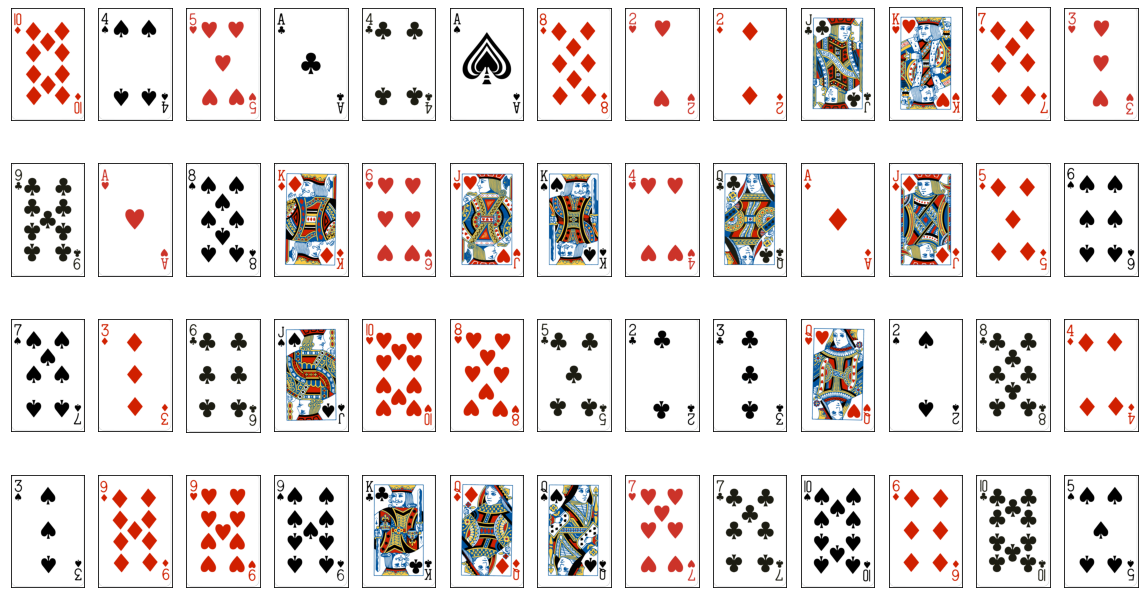

In [130]:
deck_of_cards.shuffle()
figure, axes_list = plt.subplots(nrows=4, ncols=13)

# added next two statements to increase figure size in notebook
figure.set_figwidth(16)
figure.set_figheight(9)

for axes in axes_list.ravel():
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    image_name = deck_of_cards.deal_card().image_name  # Nome da imagem
    img = mpimg.imread(str(path.joinpath(image_name).resolve()))
    axes.imshow(img)

figure.tight_layout()

#### Configuração dos objetos dos eixos e exibição das imagens

Iteramos por todos os objetos **Axes** em **axes_list**. Lembre-se de que **ravel** fornece um
visão unidimensional de uma matriz multidimensional. Para cada objeto **Axes**, realizamos as
seguintes tarefas:
- Não estamos plotando dados, então não precisamos de linhas de eixo e rótulos para cada imagem.
    - As duas primeiras instruções do laço ocultam os eixos x e y.
- A terceira declaração obtem um **Card** e seu **image_name**.
- A quarta instrução usa o método **joinpath** para anexar **image_name** a **path**, então chama o método de Path **resolve** para determinar o caminho completo para a imagem no sistema. 
    - Passamos o objeto Path resultante para a função str interna para obter a representação em string da localização da imagem. 
- A string é então passada para a função **imread** do módulo **matplotlib.image**, que carrega a imagem.
- A instrução **imshow** de **Axes** exibe a imagem atual no subplot atual.

O método **tight_layout** remove espaços extras entre as figuras, maximizando o espaço da subfiguras.

# **Exercício 04** 
Altere o código de mostrar as cartas criando uma nova figura contendo duas linhas com cinco cartas cada - estas podem representar duas mãos de pôquer de cinco cartas.

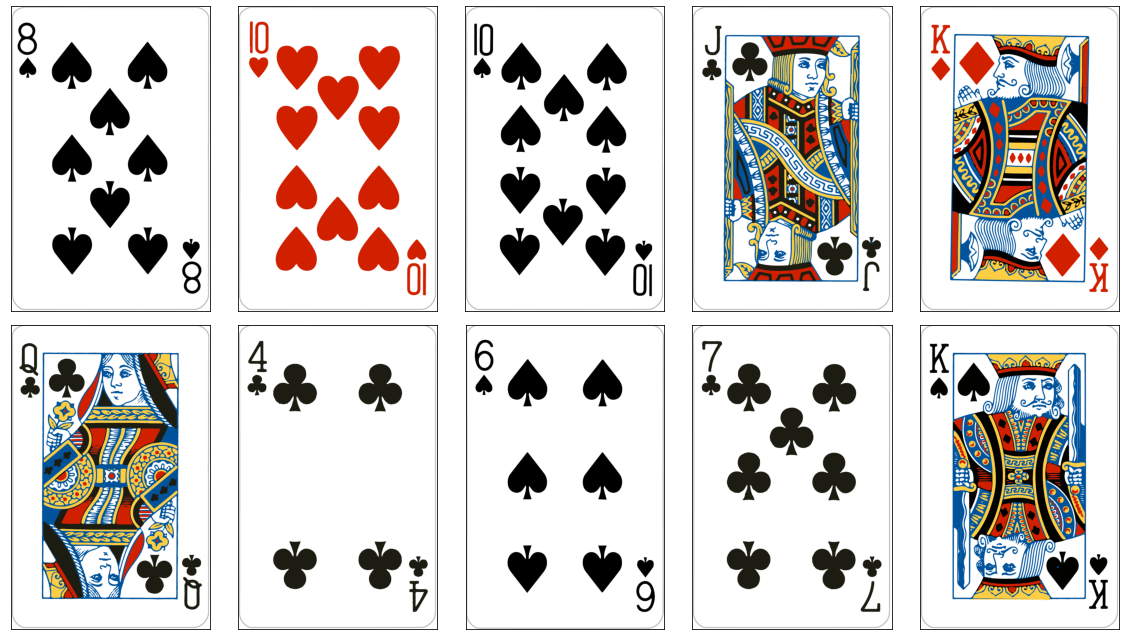

In [131]:
deck_of_cards.shuffle()
figure, axes_list = plt.subplots(nrows=2, ncols=5)  # Duas linhas e cinco colunas

# added next two statements to increase figure size in notebook
figure.set_figwidth(16)
figure.set_figheight(9)

for axes in axes_list.ravel():
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    image_name = deck_of_cards.deal_card().image_name  # Nome da imagem
    img = mpimg.imread(str(path.joinpath(image_name).resolve()))
    axes.imshow(img)

figure.tight_layout()

### Tuplas nomeadas

Você usou tuplas para agregar vários atributos de dados em um único objeto. A biblioteca padrão do Python fornece fornece o módulo **collections module** também fornece **named tuples** que permitem que você referenciar os membros de uma tupla por nome, em vez de pelo número do índice. 

Vamos criar uma tupla nomeada simples que pode ser usada para representar uma carta em um baralho. Em primeiro lugar, importe a função **namedtuple**:

In [133]:
from collections import namedtuple

A função **namedtuple** cria uma subclasse do tipo **tuple**. 
- O primeiro argumento da função é  é o nome do seu novo tipo, 
- e o segundo é uma lista de strings que representa os identificadores usados para fazer referência aos membros do novo tipo.

In [134]:
Card = namedtuple('Card', ['face', 'suit'])

Agora temos um novo tipo de tupla chamado **Card**, que podemos usar em qualquer lugar em que uma tupla possa ser usada. Vamos criar um objeto **Card**, acessar seus membros por nome e exibir sua representação em string:

In [135]:
card = Card(face='Ace', suit='Spades')

In [136]:
card.face

'Ace'

In [138]:
card.suit

'Spades'

In [139]:
card

Card(face='Ace', suit='Spades')

Cada tipo de tupla nomeada possui métodos adicionais. O _método de classe **\_make**_ (isto é, um método chamado na classe) recebe um iterável de valores e retorna um objeto do tipo da tupla nomeada.

In [140]:
values = ['Queen', 'Hearts']

In [141]:
card = Card._make(values)

In [142]:
card

Card(face='Queen', suit='Hearts')

Mais sobre *named tuples*: https://docs.python.org/3/library/collections.html#collections.namedtuple

# **Exercício 05**
Crie uma tupla nomeada chamada _Time_ com membros chamados _hour_, _minute_
e _seconds_. Em seguida, crie um objeto *Time*, acesse seus membros e exiba sua representação em string.

In [153]:
Horario = namedtuple('Horario', ['hour', 'minute', 'second'])

In [156]:
h = Horario(5, 15, 25)
h.hour

5

In [160]:
v = [6, 52, 43]
h = Horario._make(v)
h

Horario(hour=6, minute=52, second=43)

In [161]:
h.hour

6

## Uma breve introdução às novas _Data Classes_ do Python 3.7

Muito embora as tuplas nomeadas permitam que você faça referência a seus membros pelo nome, elas ainda são apenas tuplas, não classes. 

Para alguns dos benefícios das tuplas nomeadas, além dos recursos tradicionais que as classes Python fornecem, você pode usar as novas [data classes](https://www.python.org/dev/peps/pep-0557/) do Python 3.7.

As classes de dados (data classes) estão entre os novos recursos mais importantes do Python 3.7. 
- Elas te ajudam a construir classes mais rápido usando uma notação mais concisa e gerando automaticamente código "clichê", isto é, comum na maioria das classes. 
- Elas podem se tornar a forma preferida de definir muitas Classes Python.

A maioria das classes que você definirá fornece um método **\_\_init\_\_** para criar e inicializar o atributos e um método **\_\_repr\_\_** para especificar a representação de string personalizada de um objeto. 
- Se um classe tem muitos atributos de dados, criar esses métodos pode ser entediante.
- As classes de dados (data classes) geram automaticamente os atributos de dados e os métodos **\_\_init\_\_** e **\_\_repr\_\_** para voce. 
- Isso pode ser particularmente útil para classes que agregam itens de dados relacionados
    - Por exemplo, em um aplicativo que processa registros CSV, você pode querer uma classe que representa os campos de cada registro como atributos de dados em um objeto.

In [162]:
"""Card data class with class attributes, data attributes,
autogenerated methods and explicitly defined methods."""
from dataclasses import dataclass
from typing import ClassVar, List

@dataclass
class Card:
    FACES: ClassVar[List[str]] = ['Ace', '2', '3', '4', '5', '6', '7', 
                                  '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS: ClassVar[List[str]] = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    face: str
    suit: str

    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'

    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'
    
    def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'


from dataclasses import dataclass
from typing import ClassVar, List

### Importando dos módulos _dataclasses_ e _typing_

O módulo da biblioteca padrão Python, **_dataclasses_** define [decoradores](https://docs.python.org/3/library/dataclasses.html#module-level-decoratorsclasses-and-functions) e funções para implementação de classes de dados. 

- Usamos o decorador **@dataclass** para especificar que uma nova classe é uma classe de dados e faz com que vários códigos sejam escritos para você. 
- Usamos **ClassVar** e **List** do módulo **_typing_** para indicar que **FACES** e **SUITS** são de _variáveis de classe_ que se referem a listas.

### Anotações de variável: atributos de classe

Ao contrário das classes regulares, as classes de dados <font color=red>declaram</font> atributos de classe e atributos de dados dentro da classe, mas fora dos métodos da classe. 
- Em uma classe regular, apenas os atributos da classe são declarados dessa forma,
- os atributos de dados normalmente são criados em **\_\_init\_\_**. 

As classes de dados exigem informações, ou _dicas_, para distinguir atributos de classe de atributos de dados, que também afeta os detalhes de implementação dos métodos gerados automaticamente.

O código abaixo inicializa os atributos de classe FACES e SUITS

    FACES: ClassVar[List[str]] = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS: ClassVar[List[str]] = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

**: ClassVar[List[str]]** é uma [anotação de variável](https://www.python.org/dev/peps/pep-0526/) (às vezes chamado de _dica de tipo_) especificando que FACES é um atributo de classe (ClassVar) que se refere a uma lista de strings (List [str]). SUITS também é um atributo de classe que se refere a uma lista de strings.
- Variáveis de classe são inicializadas em suas definições e são específicas para a classe, e não a objetos da classe. 
- Métodos **\_\_init\_\_**, **\_\_repr\_\_** e **\_\_eq\_\_**, no entanto, são para uso com objetos da classe. Quando uma classe de dados gera esses métodos, ela inspeciona todas as variáveis anotações e inclui apenas os atributos de dados nas implementações do método.

### Anotações de variáveis: atributos de dados
Normalmente, criamos os atributos de dados de um objeto no método **\_\_init\_\_** da classe (ou métodos chamado por **\_\_init\_\_**) por meio de atribuições do tipo **self.attribute_name = value**. 
- Como uma classe de dados gera automaticamente seu método **\_\_init\_\_**, precisamos de outra maneira de especificar os atributos de dados na definição de uma classe de dados. 

Como os atributos de classe, cada atributo de dados deve ser declarado com uma anotação de variável. As linhas abaixo definem os atributos de dados **face** e **suit**. 
- A anotação de variável ": str" indica que cada um deve se referir a objetos string

    face: str
    suit: str

### Definindo uma propriedade e outros métodos

Classes de dados são classes, portanto, podem conter propriedades e métodos bem como fazer parte de hierarquias de classes. 

Para esta classe de dados **Card**, definimos a mesma propriedade **image_name** somente leitura e métodos especiais personalizados **\_\_str\_\_** e **\_\_format\_\_** como em nossa classe Card original.

    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'

    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'
    
    def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'

### <font color=red> Notas de anotação de variável</font>

Você pode especificar anotações de variáveis usando nomes de tipo (como **str**, **int** e **float**), tipos de classe ou tipos definidos pelo módulo typing (como ClassVar e List mostrados anteriormente).
- Mesmo com anotações de tipo, Python ainda é uma linguagem tipada dinamicamente. Então,  **notações de tipo não são aplicadas no tempo de execução**. 
    - Portanto, mesmo que a face de uma carta seja feita para ser uma string, você pode atribuir qualquer tipo de objeto a ela.

**Exemplo de uso**

In [163]:
c1 = Card(Card.FACES[0], Card.SUITS[3])

A seguir, vamos usar o método **\_\_repr\_\_** gerado automaticamente do Cartão para exibir a carta:

In [164]:
c1

Card(face='Ace', suit='Spades')

Nosso método **\_\_str\_\_** personalizado, que imprime chamadas ao passar um objeto Card, retorna uma string da forma: _**'face of suit'**_

In [165]:
print(c1)

Ace of Spades


Vamos acessar os atributos de nossa classe de dados e a propriedade somente leitura

In [166]:
c1.face

'Ace'

In [167]:
c1.suit

'Spades'

In [168]:
c1.image_name

'Ace_of_Spades.png'

Mais informações sobre *Data Classes*

https://www.python.org/dev/peps/pep-0557/